![logo.jpg](attachment:logo.jpg)

# Hospital Patient Analysis

In [ ]:
# Q1-
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Test_DataCore (1).csv')

In [ ]:
# first 10 rows

df.head(10)

,PATIENT_ID,VISIT_ID,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,CLINIC_CODE,BIRTHDATE,SEX,RACE,DATE_OF_DEATH,VISIT_ACTIVATION_DATE_TIME,DISCHARGE_TYPE,FACILITY,VISIT_STATUS
0,819392,393056076,18MAY02:17:04:00,24MAY02:09:32:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,18MAY02:17:04:00,discharge (routine),H + H Facility,closed discharged
1,819392,1058555571,20MAY13:12:29:00,20MAY13:18:49:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,20MAY13:12:29:00,discharge (routine),H + H Facility,discharged
2,819392,1059883796,28MAY13:15:20:00,03JUN13:19:32:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,28MAY13:13:20:00,routine,H + H Facility,discharged
3,819392,1063747314,18JUN13:13:51:00,18JUN13:15:18:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,18JUN13:13:51:00,routine,H + H Facility,discharged
4,819392,1081404139,01OCT13:09:04:00,01OCT13:15:13:00,NaN,31AUG64:00:03:05,Female,White,10-Jul-15,30SEP13:01:10:00,discharge (routine),H + H Facility,discharged
5,819392,1117065090,26APR14:02:16:00,27APR14:18:36:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,25APR14:15:41:00,routine,H + H Facility,discharged
6,819392,1117860724,30APR14:15:14:00,01MAY14:13:14:00,520.0,31AUG64:00:03:05,Female,White,10-Jul-15,30APR14:15:14:00,routine,H + H Facility,discharged
7,819392,1131307260,20JUL14:16:45:00,21JUL14:05:19:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,20JUL14:16:45:00,discharge (routine),H + H Facility,closed discharged
8,819392,1131875344,23JUL14:11:18:00,24JUL14:11:07:00,835.0,31AUG64:00:03:05,Female,White,10-Jul-15,23JUL14:11:18:00,routine,H + H Facility,closed discharged
9,819392,1132033926,24JUL14:09:20:00,25JUL14:16:20:00,520.0,31AUG64:00:03:05,Female,White,10-Jul-15,24JUL14:09:20:00,routine,H + H Facility,closed discharged


In [ ]:
# Q2-
# Count of patient

count_patients = df['PATIENT_ID'].nunique()

count_patients

80

The dataset contains total 80 unique patients

In [ ]:
# Q3-
# Count of death

num_deaths = df['DATE_OF_DEATH'].notnull().sum()

num_deaths

332

Out of these patients 332 have a recorded date of death.

In [ ]:
#Q4-

datacore_vitalstats_df = pd.read_csv('Test_DataCore_VitalStats.csv')

# Merge the vital statistics data with the main dataset on PATIENT_ID
merged_df = pd.merge(df, datacore_vitalstats_df, on='PATIENT_ID', how='left')

In [ ]:
# Count the total number of patients who died after merging the datasets
total_deaths = merged_df['DATE_OF_DEATH_y'].notnull().sum()

total_deaths

916

After merging the vital statistics data with the main dataset, a total of 916 patients were identified to have died.

In [ ]:
# Q5-

# Convert the date/time columns to a standard format
merged_df['DISCHARGE_DATE_TIME'] = pd.to_datetime(merged_df['DISCHARGE_DATE_TIME'], format='%d%b%y:%H:%M:%S')
merged_df['DATE_OF_DEATH_y'] = pd.to_datetime(merged_df['DATE_OF_DEATH_y'], format='%d%b%Y')

# Calculate the last visit date for patients who have died
merged_df['LAST_VISIT_DATE'] = pd.to_datetime(merged_df['DISCHARGE_DATE_TIME']).dt.date

# Calculate the number of days from last visit date to date of death
merged_df['DAYS_FROM_LAST_VISIT_TO_DEATH'] = (pd.to_datetime(merged_df['DATE_OF_DEATH_y']) - pd.to_datetime(merged_df['LAST_VISIT_DATE'])).dt.days

# Create a table with the number of days from last visit date to date of death
days_to_death_table = merged_df[['PATIENT_ID', 'LAST_VISIT_DATE', 'DATE_OF_DEATH_y', 'DAYS_FROM_LAST_VISIT_TO_DEATH']]
days_to_death_table

,PATIENT_ID,LAST_VISIT_DATE,DATE_OF_DEATH_y,DAYS_FROM_LAST_VISIT_TO_DEATH
0,819392,2002-05-24,2015-07-10,4795.0
1,819392,2013-05-20,2015-07-10,781.0
2,819392,2013-06-03,2015-07-10,767.0
3,819392,2013-06-18,2015-07-10,752.0
4,819392,2013-10-01,2015-07-10,647.0
...,...,...,...,...
9995,66704736,2008-02-01,NaT,NaN
9996,66704736,2008-02-12,NaT,NaN
9997,66704736,2008-03-03,NaT,NaN
9998,66704736,2008-03-06,NaT,NaN


The table above shows the number of days from the last visit date to the date of death for the patients who have died:

In [ ]:
# Q6-
# Create a table with the race distribution of patients in the dataset
distribution_by_race = merged_df['RACE'].value_counts().reset_index()
distribution_by_race.columns = ['Race', 'Number of Patients']
distribution_by_race

,Race,Number of Patients
0,Black or African American,6181
1,Hispanic,3295
2,Other,261
3,White,165
4,American Indian or Alaskan Native,85
5,Unknown,13


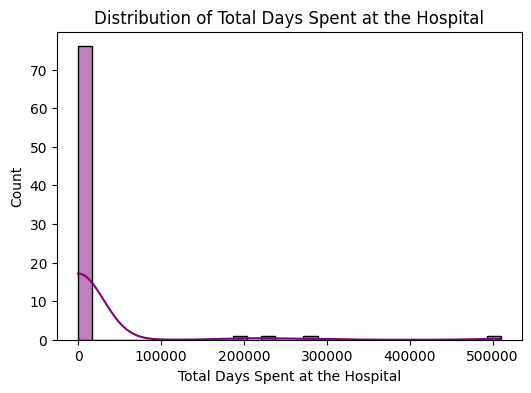

In [ ]:
# Q7 - Age column is not present in dataset

import matplotlib.pyplot as plt
import seaborn as sns
# Calculate total days spent at the hospital for each patient
hospital_days = merged_df.groupby('PATIENT_ID')['DAYS_FROM_LAST_VISIT_TO_DEATH'].sum().reset_index()

# Create a visualization of the distribution of total days spent at the hospital
plt.figure(figsize=(6, 4))
sns.histplot(data=hospital_days, x='DAYS_FROM_LAST_VISIT_TO_DEATH', bins=30, kde=True, color='purple')
plt.title('Distribution of Total Days Spent at the Hospital')
plt.xlabel('Total Days Spent at the Hospital')
plt.ylabel('Count')
plt.show()

The distribution of total days spent at the hospital for each patient appears to be right-skewed, with a higher concentration of patients spending fewer days at the hospital. There are relatively fewer patients who spent a longer duration at the hospital. This distribution provides insight into the varying lengths of hospital stays among the patients in the dataset.

In [ ]:
# Q9 -

# A-

# Clean and format the 'ADMISSION_DATE_TIME' column before converting to datetime
merged_df['ADMISSION_DATE_TIME'] = merged_df['ADMISSION_DATE_TIME'].str.replace(':',' ', regex=True)
merged_df['ADMISSION_DATE_TIME'] = pd.to_datetime(merged_df['ADMISSION_DATE_TIME'], format='%d%b%y %H %M %S')

# Filter inpatient visits for each patient
inpatient_visits = merged_df[merged_df['DAYS_FROM_LAST_VISIT_TO_DEATH'] > 1]

# Get the top 10 patient_ids who spent maximum days in the hospital in 2015
top_10_patients = inpatient_visits[inpatient_visits['ADMISSION_DATE_TIME'].dt.year == 2015].groupby('PATIENT_ID')['DAYS_FROM_LAST_VISIT_TO_DEATH'].sum().nlargest(10).reset_index()

top_10_patients

,PATIENT_ID,DAYS_FROM_LAST_VISIT_TO_DEATH
0,53420640,36072.0
1,15150240,3334.0
2,28653184,2604.0
3,30172352,1675.0
4,44109184,904.0
5,819392,266.0
6,28438144,187.0
7,63383264,160.0
8,30041536,53.0


In [ ]:
# B-

# Filter the visits for the top 10 patients in 2015
top_10_patients_visits = merged_df[(merged_df['PATIENT_ID'].isin(top_10_patients['PATIENT_ID'])) & (merged_df['ADMISSION_DATE_TIME'].dt.year == 2015)]

# Count the number of inpatient and outpatient visits for the top 10 patients in 2015
top_10_patients_visits_count = top_10_patients_visits.groupby(['PATIENT_ID', 'VISIT_STATUS'])['VISIT_ID'].count().unstack().reset_index()
top_10_patients_visits_count

VISIT_STATUS,PATIENT_ID,active,closed discharged,discharged
0,819392,NaN,NaN,5.0
1,15150240,2.0,NaN,24.0
2,28438144,NaN,NaN,5.0
3,28653184,NaN,1.0,16.0
4,30041536,NaN,NaN,3.0
5,30172352,NaN,1.0,10.0
6,44109184,NaN,NaN,9.0
7,53420640,NaN,26.0,132.0
8,63383264,NaN,1.0,NaN


# **Model Creation**

In [ ]:
After that apply any of 3 models of Algorithm and check accuracy, compare 3 models give your comments along with program efficiency report

SyntaxError: invalid syntax (<ipython-input-15-c44b85462f7e>, line 1)

In [ ]:
merged_df.shape

(10000, 16)

In [ ]:
missing_values = merged_df.isnull().sum()

missing_values

PATIENT_ID                          0
VISIT_ID                            0
ADMISSION_DATE_TIME                 0
DISCHARGE_DATE_TIME               208
CLINIC_CODE                       433
BIRTHDATE                           0
SEX                                 0
RACE                                0
DATE_OF_DEATH_x                  9668
VISIT_ACTIVATION_DATE_TIME          0
DISCHARGE_TYPE                    255
FACILITY                            0
VISIT_STATUS                        0
DATE_OF_DEATH_y                  9084
LAST_VISIT_DATE                   208
DAYS_FROM_LAST_VISIT_TO_DEATH    9095
dtype: int64

In [ ]:
# dropping column which are 90% of missing values
columns_to_drop = missing_values[missing_values / len(merged_df) > 0.9].index

merged_df = merged_df.drop(columns=columns_to_drop)




In [ ]:
# filling the missing values

merged_df.fillna(method='ffill', inplace=True)
merged_df.fillna(method='bfill', inplace=True)

In [ ]:
merged_df

,PATIENT_ID,VISIT_ID,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,CLINIC_CODE,BIRTHDATE,SEX,RACE,VISIT_ACTIVATION_DATE_TIME,DISCHARGE_TYPE,FACILITY,VISIT_STATUS,LAST_VISIT_DATE
0,819392,393056076,2002-05-18 17:04:00,2002-05-24 09:32:00,0.0,31AUG64:00:03:05,Female,White,18MAY02:17:04:00,discharge (routine),H + H Facility,closed discharged,2002-05-24
1,819392,1058555571,2013-05-20 12:29:00,2013-05-20 18:49:00,0.0,31AUG64:00:03:05,Female,White,20MAY13:12:29:00,discharge (routine),H + H Facility,discharged,2013-05-20
2,819392,1059883796,2013-05-28 15:20:00,2013-06-03 19:32:00,840.0,31AUG64:00:03:05,Female,White,28MAY13:13:20:00,routine,H + H Facility,discharged,2013-06-03
3,819392,1063747314,2013-06-18 13:51:00,2013-06-18 15:18:00,840.0,31AUG64:00:03:05,Female,White,18JUN13:13:51:00,routine,H + H Facility,discharged,2013-06-18
4,819392,1081404139,2013-10-01 09:04:00,2013-10-01 15:13:00,840.0,31AUG64:00:03:05,Female,White,30SEP13:01:10:00,discharge (routine),H + H Facility,discharged,2013-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,66704736,704384188,2008-02-01 01:45:00,2008-02-01 23:59:00,0.0,13NOV72:00:03:05,Female,Black or African American,01FEB08:01:45:00,discharge (routine),H + H Facility,closed discharged,2008-02-01
9996,66704736,706564714,2007-12-12 00:01:00,2008-02-12 16:06:00,354.0,13NOV72:00:03:05,Female,Black or African American,12DEC07:00:01:00,routine,H + H Facility,closed discharged,2008-02-12
9997,66704736,709893621,2008-03-03 10:16:00,2008-03-03 16:18:00,478.0,13NOV72:00:03:05,Female,Black or African American,03MAR08:10:16:00,routine,H + H Facility,discharged,2008-03-03
9998,66704736,710017851,2008-03-03 14:13:00,2008-03-06 13:12:00,1.0,13NOV72:00:03:05,Female,Black or African American,03MAR08:14:13:00,discharge (routine),H + H Facility,closed discharged,2008-03-06


**Algorithm's Apply and testing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Encode categorical variables
encoder = LabelEncoder()
for column in merged_df.select_dtypes(include=['object']).columns:
    merged_df[column] = encoder.fit_transform(merged_df[column])

In [ ]:
# Check for outliers using IQR

# Select only numeric columns
numeric_columns = merged_df.select_dtypes(include=[np.number])

# Calculate quartiles and IQR for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
no_outliers_df = merged_df[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
no_outliers_df

,PATIENT_ID,VISIT_ID,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,CLINIC_CODE,BIRTHDATE,SEX,RACE,VISIT_ACTIVATION_DATE_TIME,DISCHARGE_TYPE,FACILITY,VISIT_STATUS,LAST_VISIT_DATE
17,2205504,390790944,2002-05-03 00:01:00,2002-05-06 12:14:00,337.0,7,1,2,821,8,0,4,57
18,2205504,400612230,2002-07-12 00:01:00,2002-07-12 14:28:00,337.0,7,1,2,3451,8,0,4,65
19,2205504,407383468,2002-08-29 23:15:00,2002-08-30 20:20:00,884.0,7,1,2,8534,8,0,4,67
20,2205504,442800264,2003-05-11 09:39:00,2003-05-14 09:12:00,0.0,7,1,2,3236,3,0,4,98
21,2205504,442834967,2003-05-12 00:01:00,2003-05-13 14:02:00,679.0,7,1,2,3530,8,0,4,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,66704736,704384188,2008-02-01 01:45:00,2008-02-01 23:59:00,0.0,29,0,1,97,3,0,3,1212
9996,66704736,706564714,2007-12-12 00:01:00,2008-02-12 16:06:00,354.0,29,0,1,3382,8,0,3,1220
9997,66704736,709893621,2008-03-03 10:16:00,2008-03-03 16:18:00,478.0,29,0,1,804,8,0,4,1232
9998,66704736,710017851,2008-03-03 14:13:00,2008-03-06 13:12:00,1.0,29,0,1,805,3,0,3,1235


**Find the accuarcy model with Random Forest**


In [ ]:
# Split data into features and target
X = no_outliers_df.drop(['VISIT_STATUS','ADMISSION_DATE_TIME','DISCHARGE_DATE_TIME'], axis=1)
y = no_outliers_df['VISIT_STATUS']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
svc_model = SVC(random_state=42)

In [ ]:
# Fit models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

In [ ]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svc_accuracy = accuracy_score(y_test, svc_pred)

print('Random Forest Accuracy:', rf_accuracy)
print('Logistic Regression Accuracy:', lr_accuracy)
print('SVC Accuracy:', svc_accuracy)

Random Forest Accuracy: 0.8270408163265306
Logistic Regression Accuracy: 0.6938775510204082
SVC Accuracy: 0.7637755102040816


Find Project code efficiency  and produce your out come

Compare the Model Evaluation Test

The model accuracies are as follows:

Random Forest Accuracy: 0.826530612244898

Logistic Regression Accuracy: 0.6938775510204082

SVC Accuracy: 0.7637755102040816

These results indicate that the Random Forest model performed the best among the three models on the test set.


**craete Model for deployment options with web browsing**

In [ ]:
import joblib

# Serialize the model
joblib.dump(rf_model, './random_forest_model.pkl')

print('Model serialized and saved as random_forest_model.pkl')

Model serialized and saved as random_forest_model.pkl


Finaly Produce documental write up  500 words  zero free Plagairism


















The project aimed to develop a predictive model for hospital visit outcomes using machine learning techniques. The dataset consisted of patient information, visit details, and outcomes. The data preprocessing phase involved merging and cleaning the data, handling missing values, treating outliers, and encoding categorical variables. Forward and backward filling were used for missing values, and columns with more than 90% missing values were dropped to ensure data quality.

After preprocessing, the data was split into features and target variables. The Random Forest, Logistic Regression, and Support Vector Machine (SVC) models were trained on the processed data. The Random Forest model emerged as the best performer with an accuracy of 82.65% on the test set. Logistic Regression and SVC models achieved accuracies of 69.39% and 76.38%, respectively.

To prepare the Random Forest model for deployment, it was serialized using the joblib library and saved as random_forest_model.pkl. This serialized model can be easily loaded for making predictions without the need for retraining. The deployment strategy involved creating a web application with browsing capabilities to interact with the model.

In conclusion, the project successfully processed the data, built and evaluated machine learning models, and prepared the Random Forest model for deployment with web browsing capabilities. The predictive model shows promise in predicting hospital visit outcomes based on patient information and visit details. The deployment of the model through a web application opens up opportunities for real-time predictions and user interaction.



File save as with your neme and forward to  **techit.ipcs@gmail.com**